# PCA (Principal Component Analysis)
PCA (Principal Component Analysis) adalah sebuah teknik dalam analisis data dan reduksi dimensi yang digunakan untuk mengidentifikasi pola tersembunyi dalam dataset yang kompleks. Tujuan utama dari PCA adalah mengurangi dimensi dari dataset yang memiliki banyak fitur (variabel) menjadi ruang dimensi yang lebih rendah tetapi masih mempertahankan sebagian besar informasi yang ada.

Dalam PCA, fitur-fitur dari dataset diterjemahkan ke dalam kombinasi linear baru yang disebut komponen utama (principal components). Komponen utama ini diurutkan berdasarkan tingkat variansnya, dengan komponen pertama memiliki varians tertinggi dan komponen terakhir memiliki varians terendah. Dengan menggunakan komponen utama dengan varians terbesar, PCA membantu mengungkapkan pola-pola penting dalam dataset.

PCA juga dapat digunakan untuk mereduksi dimensi dataset dengan memilih sejumlah komponen utama yang paling signifikan. Dengan mengurangi dimensi, PCA membantu mengatasi masalah overload fitur (curse of dimensionality) dan dapat meningkatkan efisiensi pemrosesan dan visualisasi data.

Selain itu, PCA juga dapat digunakan untuk menghilangkan korelasi antara fitur-fitur dalam dataset, sehingga meningkatkan interpretabilitas dan interpretasi hasil analisis data.

PCA digunakan di berbagai bidang, termasuk analisis data, pengenalan pola, kompresi data, pengolahan citra, dan banyak lagi.

# Principal Component Analysis: PCA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

## Part number of components

In [2]:
from sklearn.decomposition import PCA
model = PCA(n_components=3)    # 2. Instantiate the model with hyperparameters
model.fit(X_iris)              # 3. Fit to data. Notice y is not specified!

PCA(n_components=3)

## Transform the data

In [3]:
X_2D = model.transform(X_iris)
print("show first row of data 3", X_2D[0,:])

show first row of data 3 [-2.68412563  0.31939725 -0.02791483]


In [4]:
print(model.transform(X_iris.iloc[0, :].values.reshape(1, -1)))

[[-2.68412563  0.31939725 -0.02791483]]


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


## Insert X_2D into the original Iris DataFrame

In [5]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
iris['PCA3'] = X_2D[:,2]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079


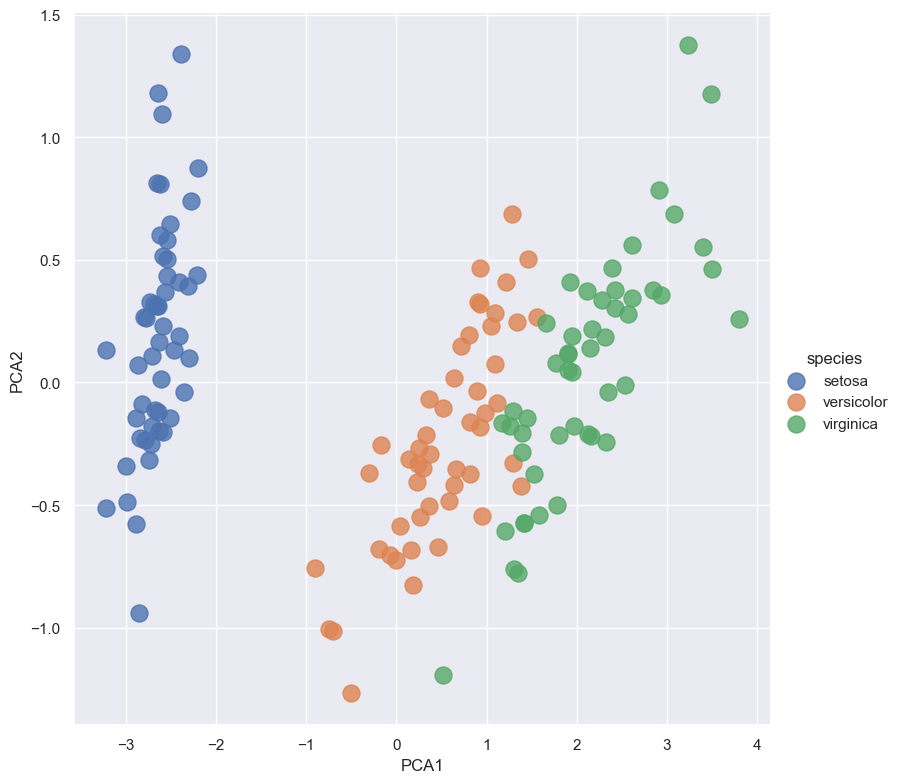

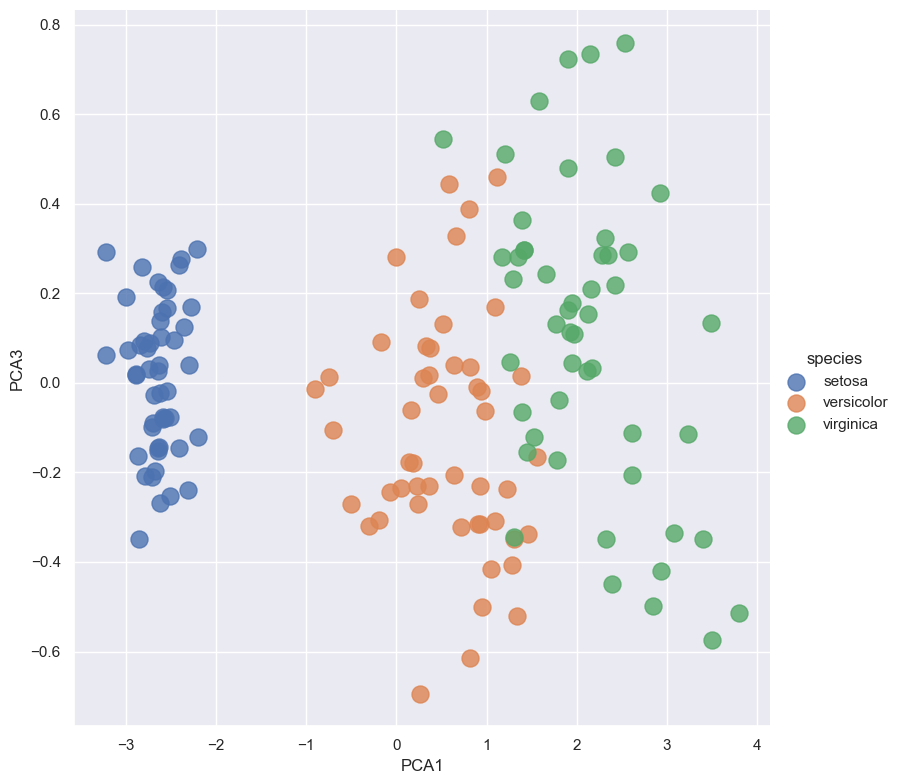

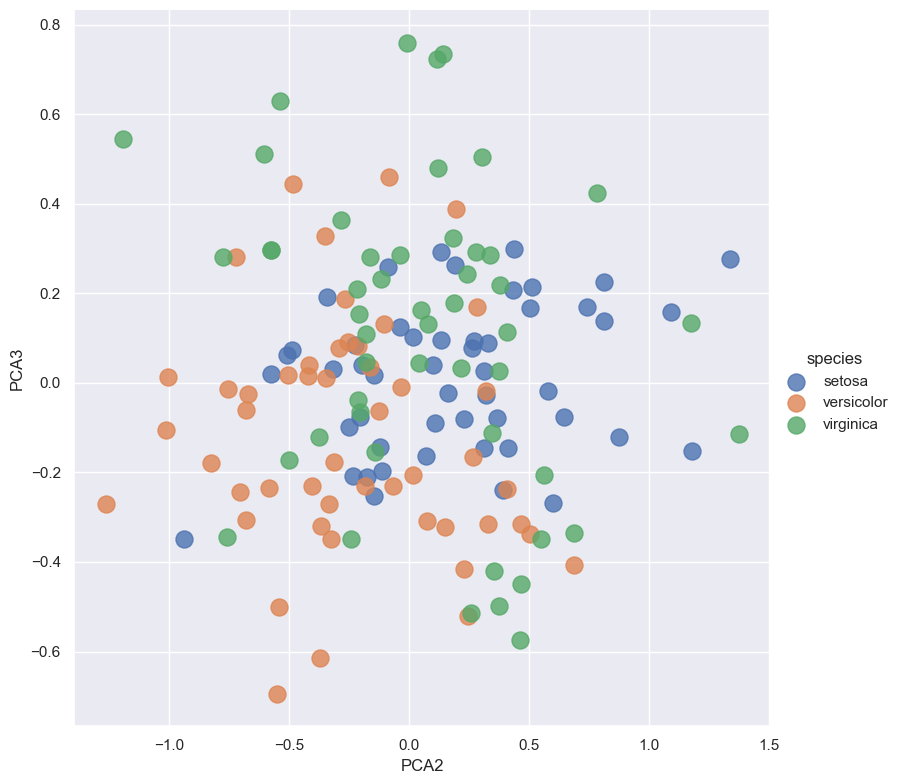

In [6]:
sns.set()
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False, height=8, scatter_kws={"s": 150})
sns.lmplot(x="PCA1", y="PCA3", hue='species', data=iris, fit_reg=False, height=8, scatter_kws={"s": 150})
sns.lmplot(x="PCA2", y="PCA3", hue='species', data=iris, fit_reg=False, height=8, scatter_kws={"s": 150})

# Training new features using Naive Bayes

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079


In [8]:
from sklearn.model_selection import train_test_split

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [9]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2,PCA3
54,6.5,2.8,4.6,1.5,1.088103,0.074591,-0.307758
108,6.7,2.5,5.8,1.8,2.321229,-0.243832,-0.348304
112,6.8,3.0,5.5,2.1,2.165592,0.216276,0.033327
17,5.1,3.5,1.4,0.3,-2.648297,0.311849,0.026668
119,6.0,2.2,5.0,1.5,1.300792,-0.761150,-0.344995


In [10]:
ytrain.head()

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [11]:
Xtrain = Xtrain[['PCA1', 'PCA2', 'PCA3']]  # Select specific columns using column names

Xtrain.head() 

,PCA1,PCA2,PCA3
54,1.088103,0.074591,-0.307758
108,2.321229,-0.243832,-0.348304
112,2.165592,0.216276,0.033327
17,-2.648297,0.311849,0.026668
119,1.300792,-0.761150,-0.344995


In [12]:
Xtest = Xtest[['PCA1','PCA2','PCA3']]
Xtest.head()

,PCA1,PCA2,PCA3
14,-2.644750,1.178765,-0.151628
98,-0.906470,-0.756093,-0.012600
75,0.900174,0.328504,-0.316209
16,-2.623528,0.810680,0.138183
131,3.230674,1.374165,-0.114548


In [13]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data

GaussianNB()

In [14]:
y_model = model.predict(Xtest)  

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9473684210526315

In [16]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

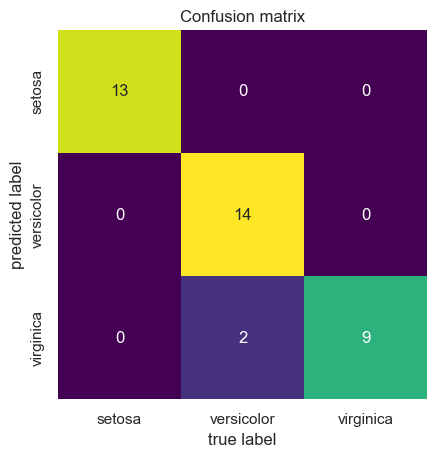

In [17]:
import matplotlib.pyplot as plt
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

plt.title('Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

# Training new features using KNN


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = knn.predict(X_test_scaled)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [21]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm

Accuracy: 1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [22]:

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,versicolor
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,versicolor
82,versicolor,versicolor


# Training new features using DecisionTreeClassifier

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079


In [24]:
from sklearn.model_selection import train_test_split


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from imblearn.over_sampling import RandomOverSampler
import pydotplus
from IPython.display import Image

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

In [27]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train_pca, y_train_resampled)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
y_pred = clf.predict(X_test_pca)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


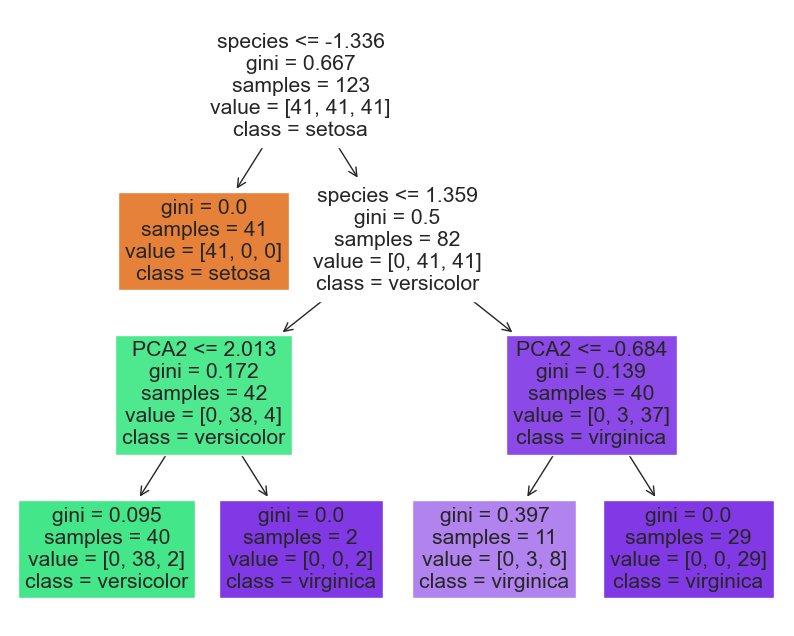

In [30]:
from sklearn import tree
feature_names = list(iris.columns[4:]) + ['PCA1', 'PCA2', 'PCA3']
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=feature_names, class_names=iris['species'].unique(), filled=True)
plt.show()

# Training new features using ANN

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_iris,y_iris, test_size= 0.2, random_state=10)

In [32]:
clf = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.001)
clf

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000, random_state=21,
              solver='sgd', tol=0.001, verbose=10)

In [33]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

Iteration 1, loss = 0.86728666
Iteration 2, loss = 0.86098206
Iteration 3, loss = 0.85222217
Iteration 4, loss = 0.84153163
Iteration 5, loss = 0.82954179
Iteration 6, loss = 0.81683062
Iteration 7, loss = 0.80357443
Iteration 8, loss = 0.78987548
Iteration 9, loss = 0.77594874
Iteration 10, loss = 0.76184036
Iteration 11, loss = 0.74767445
Iteration 12, loss = 0.73332399
Iteration 13, loss = 0.71883776
Iteration 14, loss = 0.70445264
Iteration 15, loss = 0.69036337
Iteration 16, loss = 0.67666853
Iteration 17, loss = 0.66326535
Iteration 18, loss = 0.65022063
Iteration 19, loss = 0.63753346
Iteration 20, loss = 0.62514098
Iteration 21, loss = 0.61309085
Iteration 22, loss = 0.60125266
Iteration 23, loss = 0.58958392
Iteration 24, loss = 0.57831021
Iteration 25, loss = 0.56731829
Iteration 26, loss = 0.55677280
Iteration 27, loss = 0.54669231
Iteration 28, loss = 0.53702077
Iteration 29, loss = 0.52765054
Iteration 30, loss = 0.51856010
Iteration 31, loss = 0.50967735
Iteration 32, los

Iteration 107, loss = 0.23402592
Iteration 108, loss = 0.23251041
Iteration 109, loss = 0.23101742
Iteration 110, loss = 0.22954175
Iteration 111, loss = 0.22808382
Iteration 112, loss = 0.22664098
Iteration 113, loss = 0.22521465
Iteration 114, loss = 0.22380676
Iteration 115, loss = 0.22241701
Iteration 116, loss = 0.22105276
Iteration 117, loss = 0.21970923
Iteration 118, loss = 0.21838102
Iteration 119, loss = 0.21706866
Iteration 120, loss = 0.21577152
Iteration 121, loss = 0.21448981
Iteration 122, loss = 0.21322653
Iteration 123, loss = 0.21197804
Iteration 124, loss = 0.21074581
Iteration 125, loss = 0.20953169
Iteration 126, loss = 0.20833190
Iteration 127, loss = 0.20714548
Iteration 128, loss = 0.20597187
Iteration 129, loss = 0.20481136
Iteration 130, loss = 0.20366508
Iteration 131, loss = 0.20253268
Iteration 132, loss = 0.20141358
Iteration 133, loss = 0.20030550
Iteration 134, loss = 0.19920889
Iteration 135, loss = 0.19812358
Iteration 136, loss = 0.19704966
Iteration 

In [34]:
#Menentukan akurasi
accuracy_score(y_test, y_pred)

1.0

In [35]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
87,versicolor,versicolor
111,virginica,virginica
10,setosa,setosa
91,versicolor,versicolor
49,setosa,setosa
60,versicolor,versicolor
72,versicolor,versicolor
67,versicolor,versicolor
39,setosa,setosa
55,versicolor,versicolor
